In [1]:
import numpy as np
import matplotlib
# from matplotlib import rc
import matplotlib.pyplot as plt
import math
from scipy.optimize import root
import scipy
from scipy.integrate import simps
from scipy.integrate import quad
plt.style.use('seaborn-bright')
import pandas as pd
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
import warnings

In [ ]:
matplotlib.rcParams['font.family'] = "serif"

In [ ]:
%%capture
%run ../../Model/Combined-fxns-single-2D.ipynb
%run ../../Model/MSD-fxns.ipynb

## read in things

In [ ]:
#param
# Small_Mu_Nu_V1=pd.read_csv('Small_Mu_Nu_V1.csv')
# Mu_Nu_V1=pd.read_csv('Mu_Nu_V1.csv')
# Small_Mu_Nu_V3=pd.read_csv('Small_Mu_Nu_V3.csv')
# Mu_Nu_V3=pd.read_csv('Mu_Nu_V3.csv')
# Small_Mu_Nu_V6=pd.read_csv('Small_Mu_Nu_V6.csv')
# Mu_Nu_V6=pd.read_csv('Nu_Mu_Vals_V6.csv')

In [ ]:
# Small_Mu_MSDs_V1=pd.read_csv('Small_Mu_MSDs_V1.csv')
# Normal_Mu_MSDs_V1=pd.read_csv('Normal_Mu_MSDs_V1.csv')
Small_Mu_MSDs_V3_N40=pd.read_csv('Small_Mu_MSDs_V3_N40_new.csv')#pd.read_csv('Small_Mu_MSDs_V3_N40.csv')
Normal_Mu_MSDs_V3_N40=pd.read_csv('Normal_Mu_MSDs_V3_N40.csv')
Small_Mu_MSDs_V6_N40=pd.read_csv('Small_Mu_MSDs_V6_N40.csv')
Normal_Mu_MSDs_V6_N40=pd.read_csv('VCF_Test_V6_MSDs_N40.csv')

In [ ]:
# Small_Mu_MSDs_V3=pd.read_csv('Small_Mu_MSDs_V3.csv')

In [ ]:
# Small_Mu_VCF_V1=pd.read_csv('Small_Mu_VCF_V1.csv')
# Normal_Mu_VCF_V1=pd.read_csv('Normal_Mu_VCF_V1.csv')
Small_Mu_VCF_V3_N40=pd.read_csv('Small_Mu_VCF_V3_N40_new.csv')#pd.read_csv('Small_Mu_VCF_V3_N40.csv')
Normal_Mu_VCF_V3_N40=pd.read_csv('Normal_Mu_VCF_V3_N40.csv')
Small_Mu_VCF_V6_N40=pd.read_csv('Small_Mu_VCF_V6_N40.csv')
Normal_Mu_VCF_V6_N40=pd.read_csv('VCF_Test_V6_mean_vcfs_N40.csv')

# Panel (B)

In [ ]:
#using V and mu and nu instead of Vmu, numu
def fun(x,nu,mu,phi,V):
    return(((np.pi/2)**2*(nu/mu)*phi)*(np.tan(np.pi*x/2))*(1+np.tan(np.pi*x/2))**(-2)
           *(np.tan(np.pi*x/2)**2 +1)**(1)
           *np.exp(-((V/mu)**2)*(np.tan(np.pi*x/2)**2)/(4*(1+np.tan(np.pi*x/2)))) )

In [ ]:
def intfun(tpts,nu,mu,phi,V):
    return(scipy.integrate.simps(fun(tpts,nu, mu,phi,V),tpts,even='avg'))

In [ ]:
# nus_1= np.linspace(0,500,50)*1

# tpts=np.linspace(0,1,100000);
# Vs_mu1=np.zeros(len(nus_1))
# for i in range (0, len(Vs_mu1)):
#     temp=scipy.optimize.root(lambda x: intfun(tpts,nus_1[i], 1, 1,x)-1, 1, )
#     Vs_mu1[i]=temp.x

In [ ]:
# nus_3= np.linspace(0,500,50)*3
# tpts=np.linspace(0,1,100000);
# Vs_mu3=np.zeros(len(nus_3))
# for i in range (0, len(Vs_mu3)):
#     temp=scipy.optimize.root(lambda x: intfun(tpts,nus_3[i], 3, 1,x)-1, 1, )
#     Vs_mu3[i]=temp.x

In [ ]:
nus_5= np.linspace(0,500,50)*5

tpts=np.linspace(0,1,100000);
Vs_mu5=np.zeros(len(nus_5))
for i in range (0, len(Vs_mu5)):
    temp=scipy.optimize.root(lambda x: intfun(tpts,nus_5[i], 5, 1,x)-1, 1, )
    Vs_mu5[i]=temp.x

In [ ]:
# mu1intercepts = pd.read_csv("intercepts_mu1.csv")
# mu2intercepts = pd.read_csv("intercepts_mu2.csv")
# mu3intercepts = pd.read_csv("intercepts_mu3.csv")
# mu4intercepts = pd.read_csv("intercepts_mu4.csv")
mu5intercepts = pd.read_csv("intercepts_mu5.csv")

# Panel (C) Fits of Our Model

In [ ]:
def exp_func(x,a, b):
    return a * np.exp(-x/(2*b)) 

tstart=0; tend=30; tstep=30*800
tpts=np.linspace(tstart,tend,tstep)
#actual tpts
tpts_fit=tpts[500:4000]
#tpts shifted to start at 0
tpts_fit_shift=tpts[0:3500]
dt=(tend-tstart)/(tstep-1)

In [ ]:
xdata = tpts_fit

ydata1 = Small_Mu_VCF_V3_N40['mu=0.01'][500:4000]
ydata2 = Normal_Mu_VCF_V3_N40['mu=3'][500:4000]
ydata3 = Small_Mu_VCF_V6_N40['mu=0.011'][500:4000]
ydata4 = Normal_Mu_VCF_V6_N40['mu=3'][500:4000]

popt1, pcov1 = curve_fit(exp_func,xdata, ydata1)
popt2, pcov2 = curve_fit(exp_func,xdata, ydata2)
popt3, pcov3 = curve_fit(exp_func,xdata, ydata3)
popt4, pcov4 = curve_fit(exp_func,xdata, ydata4)


In [ ]:
print(popt1[1], 'mu = 0.01, V = 3')
print(popt2[1], 'mu = 3, V = 3')
print(popt3[1], 'mu = 0.01, V = 6')
print(popt4[1], 'mu = 3, V = 6')

2.3355209797520615 mu = 0.01, V = 3
18.612452815043902 mu = 3, V = 3
1.9903939701737043 mu = 0.01, V = 6
4.289784757159894 mu = 3, V = 6


# Panel (C) Fits of ABP

In [ ]:
# fit tau from ABP theory: E[X^2]= (4*V**2*tau + 2*eps)*t
def abp_eff_diff_V3(x, tau):
#     V=3
#     eps=0.75
    return (4*(3**2)*tau + 2*0.75)*x

def abp_eff_diff_V6(x, tau):
#     V=6
#     eps=0.75
    return (4*(6**2)*tau + 2*0.75)*x

In [ ]:
xdata_diff=tpts[10000:23999]
ydata_diff1=Small_Mu_MSDs_V3_N40['mu=0.01'][10000:23999]
ydata_diff2=Normal_Mu_MSDs_V3_N40['mu=3'][10000:23999]
ydata_diff3=Small_Mu_MSDs_V6_N40['mu=0.011'][10000:23999]
ydata_diff4=Normal_Mu_MSDs_V6_N40['mu=3'][10000:23999]


popt_abp1, pcov_abp1 =curve_fit(abp_eff_diff_V3, xdata_diff, ydata_diff1)
popt_abp2, pcov_abp2 =curve_fit(abp_eff_diff_V3, xdata_diff, ydata_diff2)
popt_abp3, pcov_abp3 =curve_fit(abp_eff_diff_V6, xdata_diff, ydata_diff3)
popt_abp4, pcov_abp4 =curve_fit(abp_eff_diff_V6, xdata_diff, ydata_diff4)

print(popt_abp1)
print(popt_abp2)
print(popt_abp3)
print(popt_abp4)

[1.40421023]
[3.08978344]
[1.32800329]
[2.09956478]


# Panel (D) ABP estimated tau from MSD

In [ ]:
def abp_full_V3(x, tau):
    V=3
    eps=0.75**2
    value = 4*((tau*V)**2)*(x/tau + 2*(np.exp(-x/(2*tau))-1)) + 2*(eps)*x
    return (value)

def abp_full_V6(x, tau):
    V=6
    eps=0.75**2
    value = 4*((tau*V)**2)*(x/tau + 2*(np.exp(-x/(2*tau))-1)) + 2*(eps)*x
    return (value)

In [ ]:
# xdata_diff=tpts[10000:23999] #range of time lags where effective diffusion happens
                            # visually checked MSDSs and all of the below pull away at or before 10**4 time steps
xdata_diff = tpts[0:23999]
ydata_small_mu_V3_a=Small_Mu_MSDs_V3_N40['mu=0.005'][0:23999] #[10000:23999]
ydata_small_mu_V3_b=Small_Mu_MSDs_V3_N40['mu=0.01'][0:23999]
ydata_small_mu_V3_c=Small_Mu_MSDs_V3_N40['mu=0.05'][0:23999]
ydata_small_mu_V3_d=Small_Mu_MSDs_V3_N40['mu=0.1'][0:23999]
ydata_small_mu_V3_e=Small_Mu_MSDs_V3_N40['mu=0.5'][0:23999]

ydata_normal_mu_V3_a=Normal_Mu_MSDs_V3_N40['mu=1'][0:23999]
ydata_normal_mu_V3_b=Normal_Mu_MSDs_V3_N40['mu=2'][0:23999]
ydata_normal_mu_V3_c=Normal_Mu_MSDs_V3_N40['mu=3'][0:23999]
ydata_normal_mu_V3_d=Normal_Mu_MSDs_V3_N40['mu=4'][0:23999]
ydata_normal_mu_V3_e=Normal_Mu_MSDs_V3_N40['mu=5'][0:23999]

ydata_small_mu_V6_a=Small_Mu_MSDs_V6_N40['mu=0.0056'][0:23999]
ydata_small_mu_V6_b=Small_Mu_MSDs_V6_N40['mu=0.011'][0:23999]
ydata_small_mu_V6_c=Small_Mu_MSDs_V6_N40['mu=0.02'][0:23999]
ydata_small_mu_V6_d=Small_Mu_MSDs_V6_N40['mu=0.11'][0:23999]
ydata_small_mu_V6_e=Small_Mu_MSDs_V6_N40['mu=0.40'][0:23999]

ydata_normal_mu_V6_a=Normal_Mu_MSDs_V6_N40['mu=1'][0:23999]
ydata_normal_mu_V6_b=Normal_Mu_MSDs_V6_N40['mu=2'][0:23999]
ydata_normal_mu_V6_c=Normal_Mu_MSDs_V6_N40['mu=3'][0:23999]
ydata_normal_mu_V6_d=Normal_Mu_MSDs_V6_N40['mu=4'][0:23999]
ydata_normal_mu_V6_e=Normal_Mu_MSDs_V6_N40['mu=5'][0:23999]

popt_abp_small_mu_V3_a, pcov_abp_small_mu_V3_a =curve_fit(abp_full_V3, xdata_diff, ydata_small_mu_V3_a)
popt_abp_small_mu_V3_b, pcov_abp_small_mu_V3_b =curve_fit(abp_full_V3, xdata_diff, ydata_small_mu_V3_b)
popt_abp_small_mu_V3_c, pcov_abp_small_mu_V3_c =curve_fit(abp_full_V3, xdata_diff, ydata_small_mu_V3_c)
popt_abp_small_mu_V3_d, pcov_abp_small_mu_V3_d =curve_fit(abp_full_V3, xdata_diff, ydata_small_mu_V3_d)
popt_abp_small_mu_V3_e, pcov_abp_small_mu_V3_e =curve_fit(abp_full_V3, xdata_diff, ydata_small_mu_V3_e)

popt_abp_normal_mu_V3_a, pcov_abp_normal_mu_V3_a =curve_fit(abp_full_V3, xdata_diff, ydata_normal_mu_V3_a)
popt_abp_normal_mu_V3_b, pcov_abp_normal_mu_V3_a =curve_fit(abp_full_V3, xdata_diff, ydata_normal_mu_V3_b)
popt_abp_normal_mu_V3_c, pcov_abp_normal_mu_V3_a =curve_fit(abp_full_V3, xdata_diff, ydata_normal_mu_V3_c)
popt_abp_normal_mu_V3_d, pcov_abp_normal_mu_V3_a =curve_fit(abp_full_V3, xdata_diff, ydata_normal_mu_V3_d)
popt_abp_normal_mu_V3_e, pcov_abp_normal_mu_V3_a =curve_fit(abp_full_V3, xdata_diff, ydata_normal_mu_V3_e)

popt_abp_small_mu_V6_a, pcov_abp_small_mu_V6_a =curve_fit(abp_full_V6, xdata_diff, ydata_small_mu_V6_a)
popt_abp_small_mu_V6_b, pcov_abp_small_mu_V6_b =curve_fit(abp_full_V6, xdata_diff, ydata_small_mu_V6_b)
popt_abp_small_mu_V6_c, pcov_abp_small_mu_V6_c =curve_fit(abp_full_V6, xdata_diff, ydata_small_mu_V6_c)
popt_abp_small_mu_V6_d, pcov_abp_small_mu_V6_d =curve_fit(abp_full_V6, xdata_diff, ydata_small_mu_V6_d)
popt_abp_small_mu_V6_e, pcov_abp_small_mu_V6_e =curve_fit(abp_full_V6, xdata_diff, ydata_small_mu_V6_e)

popt_abp_normal_mu_V6_a, pcov_abp_normal_mu_V6_a =curve_fit(abp_full_V6, xdata_diff, ydata_normal_mu_V6_a)
popt_abp_normal_mu_V6_b, pcov_abp_normal_mu_V6_a =curve_fit(abp_full_V6, xdata_diff, ydata_normal_mu_V6_b)
popt_abp_normal_mu_V6_c, pcov_abp_normal_mu_V6_a =curve_fit(abp_full_V6, xdata_diff, ydata_normal_mu_V6_c)
popt_abp_normal_mu_V6_d, pcov_abp_normal_mu_V6_a =curve_fit(abp_full_V6, xdata_diff, ydata_normal_mu_V6_d)
popt_abp_normal_mu_V6_e, pcov_abp_normal_mu_V6_a =curve_fit(abp_full_V6, xdata_diff, ydata_normal_mu_V6_e)

In [ ]:
V3_ABP_fitted_tau=[popt_abp_small_mu_V3_a,popt_abp_small_mu_V3_b,popt_abp_small_mu_V3_c,
                            popt_abp_small_mu_V3_d,popt_abp_small_mu_V3_e,
                   popt_abp_normal_mu_V3_a,popt_abp_normal_mu_V3_b,popt_abp_normal_mu_V3_c,
                            popt_abp_normal_mu_V3_d,popt_abp_normal_mu_V3_e]
V6_ABP_fitted_tau=[popt_abp_small_mu_V6_a,popt_abp_small_mu_V6_b,popt_abp_small_mu_V6_c,
                            popt_abp_small_mu_V6_d,popt_abp_small_mu_V6_e,
                   popt_abp_normal_mu_V6_a,popt_abp_normal_mu_V6_b,popt_abp_normal_mu_V6_c,
                            popt_abp_normal_mu_V6_d,popt_abp_normal_mu_V6_e]

In [ ]:
print(np.log10(V6_ABP_fitted_tau))
# print(np.log10(V3_ABP_fitted_tau))

[[0.18689267]
 [0.18697851]
 [0.18583731]
 [0.19970998]
 [0.22901467]
 [0.28791922]
 [0.35462333]
 [0.44156918]
 [0.52369049]
 [0.60961688]]


# Panel (D) Model estimated tau from OCF and ABP estimated tau from MSD

In [ ]:
xdata_mod=tpts[500:4000] #range of time lags where effective diffusion happens
                            # visually checked MSDSs and all of the below pull away at or before 10**4 time steps
ydata_small_mu_V3_a=Small_Mu_VCF_V3_N40['mu=0.005'][500:4000]
ydata_small_mu_V3_b=Small_Mu_VCF_V3_N40['mu=0.01'][500:4000]
ydata_small_mu_V3_c=Small_Mu_VCF_V3_N40['mu=0.05'][500:4000]
ydata_small_mu_V3_d=Small_Mu_VCF_V3_N40['mu=0.1'][500:4000]
ydata_small_mu_V3_e=Small_Mu_VCF_V3_N40['mu=0.5'][500:4000]

ydata_normal_mu_V3_a=Normal_Mu_VCF_V3_N40['mu=1'][500:4000]
ydata_normal_mu_V3_b=Normal_Mu_VCF_V3_N40['mu=2'][500:4000]
ydata_normal_mu_V3_c=Normal_Mu_VCF_V3_N40['mu=3'][500:4000]
ydata_normal_mu_V3_d=Normal_Mu_VCF_V3_N40['mu=4'][500:4000]
ydata_normal_mu_V3_e=Normal_Mu_VCF_V3_N40['mu=5'][500:4000]

ydata_small_mu_V6_a=Small_Mu_VCF_V6_N40['mu=0.0056'][500:4000]
ydata_small_mu_V6_b=Small_Mu_VCF_V6_N40['mu=0.011'][500:4000]
ydata_small_mu_V6_c=Small_Mu_VCF_V6_N40['mu=0.02'][500:4000]
ydata_small_mu_V6_d=Small_Mu_VCF_V6_N40['mu=0.11'][500:4000]
ydata_small_mu_V6_e=Small_Mu_VCF_V6_N40['mu=0.40'][500:4000]

ydata_normal_mu_V6_a=Normal_Mu_VCF_V6_N40['mu=1'][500:4000]
ydata_normal_mu_V6_b=Normal_Mu_VCF_V6_N40['mu=2'][500:4000]
ydata_normal_mu_V6_c=Normal_Mu_VCF_V6_N40['mu=3'][500:4000]
ydata_normal_mu_V6_d=Normal_Mu_VCF_V6_N40['mu=4'][500:4000]
ydata_normal_mu_V6_e=Normal_Mu_VCF_V6_N40['mu=5'][500:4000]


In [ ]:
def exp_func(x,a, b):
    return a * np.exp(-x/(2*b)) 

In [ ]:
#model fits using above exponential function: a*exp(-x/tau)
popt_mod_small_mu_V3_a, pcov_mod_small_mu_V3_a =curve_fit(exp_func, xdata_mod, ydata_small_mu_V3_a)
popt_mod_small_mu_V3_b, pcov_mod_small_mu_V3_b =curve_fit(exp_func, xdata_mod, ydata_small_mu_V3_b)
popt_mod_small_mu_V3_c, pcov_mod_small_mu_V3_c =curve_fit(exp_func, xdata_mod, ydata_small_mu_V3_c)
popt_mod_small_mu_V3_d, pcov_mod_small_mu_V3_d =curve_fit(exp_func, xdata_mod, ydata_small_mu_V3_d)
popt_mod_small_mu_V3_e, pcov_mod_small_mu_V3_e =curve_fit(exp_func, xdata_mod, ydata_small_mu_V3_e)

popt_mod_normal_mu_V3_a, pcov_mod_normal_mu_V3_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V3_a)
popt_mod_normal_mu_V3_b, pcov_mod_normal_mu_V3_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V3_b)
popt_mod_normal_mu_V3_c, pcov_mod_normal_mu_V3_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V3_c)
popt_mod_normal_mu_V3_d, pcov_mod_normal_mu_V3_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V3_d)
popt_mod_normal_mu_V3_e, pcov_mod_normal_mu_V3_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V3_e)

popt_mod_small_mu_V6_a, pcov_mod_small_mu_V6_a =curve_fit(exp_func, xdata_mod, ydata_small_mu_V6_a)
popt_mod_small_mu_V6_b, pcov_mod_small_mu_V6_b =curve_fit(exp_func, xdata_mod, ydata_small_mu_V6_b)
popt_mod_small_mu_V6_c, pcov_mod_small_mu_V6_c =curve_fit(exp_func, xdata_mod, ydata_small_mu_V6_c)
popt_mod_small_mu_V6_d, pcov_mod_small_mu_V6_d =curve_fit(exp_func, xdata_mod, ydata_small_mu_V6_d)
popt_mod_small_mu_V6_e, pcov_mod_small_mu_V6_e =curve_fit(exp_func, xdata_mod, ydata_small_mu_V6_e)

popt_mod_normal_mu_V6_a, pcov_mod_normal_mu_V6_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V6_a)
popt_mod_normal_mu_V6_b, pcov_mod_normal_mu_V6_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V6_b)
popt_mod_normal_mu_V6_c, pcov_mod_normal_mu_V6_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V6_c)
popt_mod_normal_mu_V6_d, pcov_mod_normal_mu_V6_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V6_d)
popt_mod_normal_mu_V6_e, pcov_mod_normal_mu_V6_a =curve_fit(exp_func, xdata_mod, ydata_normal_mu_V6_e)
#xdata_diff???

In [ ]:
V3_mod_fitted_tau=[popt_mod_small_mu_V3_a[1],popt_mod_small_mu_V3_b[1],popt_mod_small_mu_V3_c[1],popt_mod_small_mu_V3_d[1],
                  popt_mod_small_mu_V3_e[1],
                  popt_mod_normal_mu_V3_a[1],popt_mod_normal_mu_V3_b[1],popt_mod_normal_mu_V3_c[1],popt_mod_normal_mu_V3_d[1],
                  popt_mod_normal_mu_V3_e[1]]
V6_mod_fitted_tau=[popt_mod_small_mu_V6_a[1],popt_mod_small_mu_V6_b[1],popt_mod_small_mu_V6_c[1],popt_mod_small_mu_V6_d[1],
                  popt_mod_small_mu_V6_e[1],
                  popt_mod_normal_mu_V6_a[1],popt_mod_normal_mu_V6_b[1],popt_mod_normal_mu_V6_c[1],popt_mod_normal_mu_V6_d[1],
                  popt_mod_normal_mu_V6_e[1]]

In [ ]:
# tau_V3=np.asarray([  4.0676722 ,   4.10949625,   4.07563538,   4.66437473,
#          8.45289901,  13.81587288,  29.70908563,  52.3059792 ,
#         54.80257673, 139.95058793])
# tau_V3

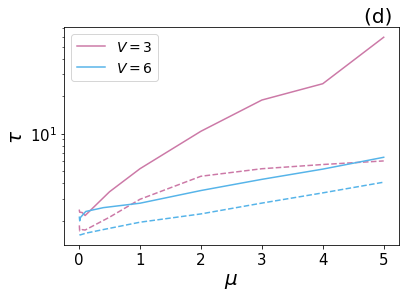

In [ ]:
# #---------d------------------
#plt.style.use('seaborn-bright')
# ax4=plt.subplot(3,2,4)

mu_V6=np.asarray([0.0056, 0.011, 0.02,0.11,0.4,1,2,3,4,5])
mu_V3=np.asarray([0.005,0.01,0.05,0.1,0.5,1,2,3,4,5])

plt.semilogy(mu_V3,V3_mod_fitted_tau, label =r'$V=3$',c=(204/255,121/255,167/255))#red
#ax[1,1].scatter(mu_V3, V3_ABP_fitted_tau,c='limegreen',s=15)
plt.semilogy(mu_V3, V3_ABP_fitted_tau,linestyle='dashed',c=(204/255,121/255,167/255))#red

plt.semilogy(mu_V6,V6_mod_fitted_tau, label = r'$V=6$',c=(86/255,180/255,233/255)) #sky blue
#ax[1,1].scatter(mu_V6, V6_ABP_fitted_tau,c='fuchsia',s=15)
plt.semilogy(mu_V6, V6_ABP_fitted_tau,linestyle='dashed',c=(86/255,180/255,233/255))

plt.xlabel(r'$\mu$',fontsize=20);
plt.ylabel(r'$\tau$',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('(d) ',fontsize=20,loc='right')
plt.legend( fontsize=14)
# #plt.grid()

# test

In [ ]:
print(popt1[1], 'mu = 0.01, V = 3')
print(popt2[1], 'mu = 3, V = 3')
print(popt3[1], 'mu = 0.01, V = 6')
print(popt4[1], 'mu = 3, V = 6')

2.3355209797520615 mu = 0.01, V = 3
18.612452815043902 mu = 3, V = 3
1.9903939701737043 mu = 0.01, V = 6
4.289784757159894 mu = 3, V = 6


(0.31622776601683794, 35.48133892335755)

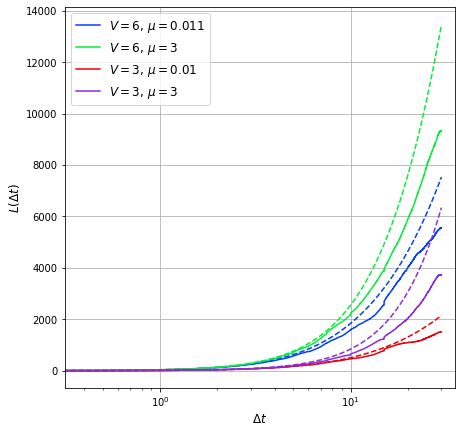

In [ ]:
fig,ax5=plt.subplots(figsize=(7,7))
eps=0.75

# plt.style.use('seaborn-bright')
# rc('text', usetex=True)


plt.semilogx(tpts[1:len(tpts)],Small_Mu_MSDs_V6_N40['mu=0.011'],  label= r'$V=6$, $\mu =0.011$')#,
            #c=(0,158/255,115/255)); #green);
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=6,tau=2.0,eps=eps),
                 color=ax5.get_lines()[0].get_color(),linestyle='dashed');

plt.semilogx(tpts[1:len(tpts)],Normal_Mu_MSDs_V6_N40['mu=3'], label= r'$V=6$, $\mu =3$')
            # c=(213/255,94/255,0));#vermillion);
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=6,tau=4.3,eps=eps),
                 c=ax5.get_lines()[2].get_color(),linestyle='dashed');

plt.semilogx(tpts[1:len(tpts)],Small_Mu_MSDs_V3_N40['mu=0.01'], label= r'$V=3$, $\mu =0.01$')#,
            #c=(240/255,228/255,66/255))# yellow); 
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=3,tau=2.3,eps=eps),
                color=ax5.get_lines()[4].get_color(),linestyle='dashed');

plt.semilogx(tpts[1:len(tpts)],Normal_Mu_MSDs_V3_N40['mu=3'], label= r'$V=3$, $\mu =3$')#,
            #c=(0,114/255,178/255)); #blue);
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=3,tau=18.6,eps=eps),
                 color=ax5.get_lines()[6].get_color(),linestyle='dashed');

# plt.title( '(e) ',fontsize=20,loc='left')
plt.grid()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(r'$\Delta t$', fontsize=12);
plt.ylabel(r'$L(\Delta t) $',fontsize=12);
plt.legend(loc='upper left',fontsize=12)
plt.xlim(10**-0.5, 10**1.55)

In [ ]:
fig.savefig("Fixed_MSD_compare_poster.pdf")

(0.0031622776601683794, 35.48133892335755)

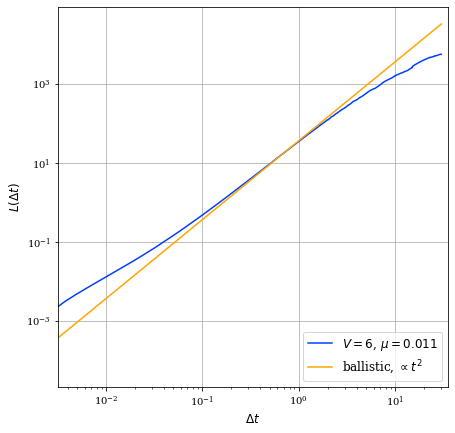

In [ ]:
fig,ax5=plt.subplots(figsize=(7,7))
eps=0.75

# plt.style.use('seaborn-bright')
# rc('text', usetex=True)


plt.loglog(tpts[1:len(tpts)],Small_Mu_MSDs_V6_N40['mu=0.011'],  label= r'$V=6$, $\mu =0.011$')#,

    
plt.loglog(tpts[1:len(tpts)], (6*tpts[1:len(tpts)])**2,c='orange', label='ballistic, $\propto t^2$')#, linestyle='dotted')

# plt.loglog(tpts[1:len(tpts)], (eps*tpts[1:len(tpts)]),c='orange',label='diffusion, $\propto t^1$')#, linestyle='dotted')


# plt.title( '(e) ',fontsize=20,loc='left')
plt.grid()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(r'$\Delta t$', fontsize=12);
plt.ylabel(r'$L(\Delta t) $',fontsize=12);
plt.legend(loc='lower right',fontsize=12)
plt.xlim(10**-2.5, 10**1.55)

In [ ]:
fig.savefig("MSD_regimes_poster.pdf")

(0.31622776601683794, 35.48133892335755)

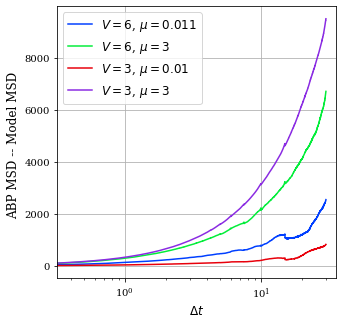

In [ ]:
fig,ax5=plt.subplots(figsize=(5,5))
eps=0.75

# plt.style.use('seaborn-bright')
# rc('text', usetex=True)


plt.semilogx(tpts[1:len(tpts)],maybe_msd_with_noise(tpts,V=6,tau=2.0,eps=eps) - Small_Mu_MSDs_V6_N40['mu=0.011'],  label= r'$V=6$, $\mu =0.011$')#,
            #c=(0,158/255,115/255)); #green);


plt.semilogx(tpts[1:len(tpts)],maybe_msd_with_noise(tpts,V=6,tau=4.3,eps=eps) - Normal_Mu_MSDs_V6_N40['mu=3'], label= r'$V=6$, $\mu =3$')
            # c=(213/255,94/255,0));#vermillion);


plt.semilogx(tpts[1:len(tpts)],maybe_msd_with_noise(tpts,V=3,tau=2.3,eps=eps) - Small_Mu_MSDs_V3_N40['mu=0.01'], label= r'$V=3$, $\mu =0.01$')#,
            #c=(240/255,228/255,66/255))# yellow); 


plt.semilogx(tpts[1:len(tpts)],maybe_msd_with_noise(tpts,V=3,tau=18.6,eps=eps) - Normal_Mu_MSDs_V3_N40['mu=3'], label= r'$V=3$, $\mu =3$')#,
            #c=(0,114/255,178/255)); #blue);

# plt.title( '(e) ',fontsize=20,loc='left')
plt.grid()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(r'$\Delta t$', fontsize=12);
plt.ylabel(r'ABP MSD -- Model MSD ',fontsize=12);
plt.legend(loc='upper left',fontsize=12)
plt.xlim(10**-0.5, 10**1.55)

# FIGURE

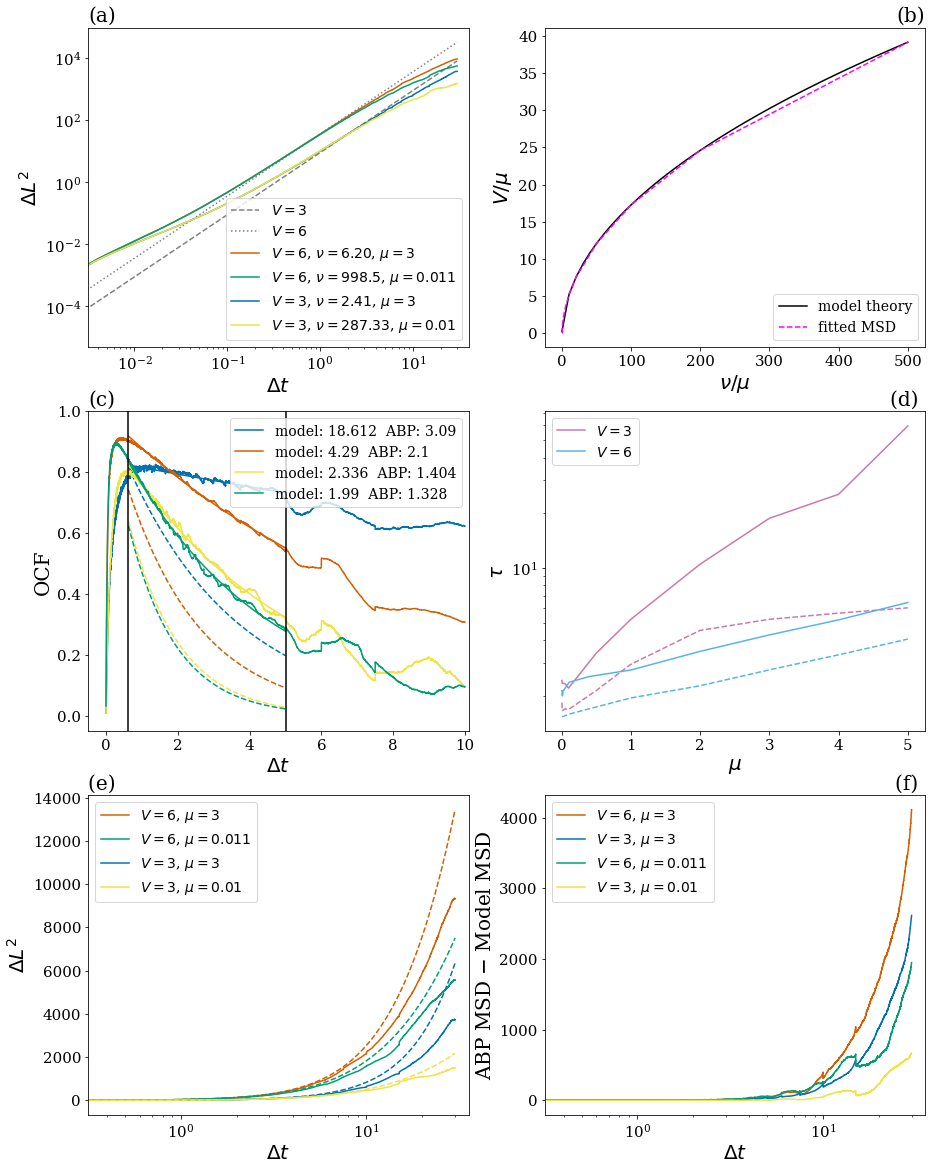

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(15,20))

#plt.style.use('seaborn-bright')
# rc('text', usetex=True)

tstart=0; tend=30; tstep=30*800
tpts=np.linspace(tstart,tend,tstep)
eps=0.75

#---a-----------------------------
ax1=plt.subplot(3,2,1)
#ax1.set_facecolor('xkcd:white')

plt.loglog(tpts[1:len(tpts)],(3**2)*tpts[1:len(tpts)]**2,c='gray', label=r'$V=3$',linestyle='dashed')
plt.loglog(tpts[1:len(tpts)], (6*tpts[1:len(tpts)])**2,c='gray', label= r'$V=6$',linestyle='dotted')

plt.loglog(tpts[1:len(tpts)],Normal_Mu_MSDs_V6_N40['mu=3'], label= r'$V=6$, $\nu=6.20$, $\mu =3$',
          c=(213/255,94/255,0));#vermillion);

plt.loglog(tpts[1:len(tpts)],Small_Mu_MSDs_V6_N40['mu=0.011'], label= r'$V=6$, $\nu=998.5$, $\mu =0.011$',
           c=(0,158/255,115/255)); #green);

plt.loglog(tpts[1:len(tpts)],Normal_Mu_MSDs_V3_N40['mu=3'], label= r'$V=3$, $\nu=2.41$, $\mu =3$',
          c=(0,114/255,178/255)); #blue);

plt.loglog(tpts[1:len(tpts)],Small_Mu_MSDs_V3_N40['mu=0.01'], label= r'$V=3$, $\nu=287.33$, $\mu =0.01$',
          c=(240/255,228/255,66/255))# yellow);



plt.title( '(a)',fontsize=20,loc='left')
plt.xlabel(r'$\Delta t$', fontname='MathJax_Main-Bold',fontsize=20);
plt.ylabel(r'$\Delta L ^2$', fontname='MathJax_Main-Bold',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right', fontsize=14)

plt.xlim(10**-2.5, 10**1.6)
# ax[0,0].set_ylim(10**0.5, 10**5)
# plt.grid()

# #----b---------------------------
# eps =0.05 for these plots!!!

#plt.style.use('seaborn-bright')
ax2=plt.subplot(3,2,2)

plt.plot(nus_5/5, Vs_mu5/5,  label='model theory', c='black')
plt.plot(mu5intercepts['nu']/mu5intercepts['mu'], 
         mu5intercepts['swim int']/mu5intercepts['mu'], label='fitted MSD',c='fuchsia',
             linestyle='dashed',)

plt.xlabel(r'$\nu /\mu$',fontsize=20)
plt.ylabel(r'$V/\mu$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('(b)',fontsize=20,loc='right')
plt.legend(loc='lower right', fontsize=14)
#plt.grid()

# ###########-----c---------

#plt.style.use('seaborn-bright')
ax3= plt.subplot(3,2,3)
#OCF cut off at 10 seconds cause it gets ugly

tstart=0; tend=30; tstep=30*800
tpts=np.linspace(tstart,tend,tstep)
#actual tpts
tpts_fit=tpts[500:4000]


plt.plot(tpts[0:7999], Normal_Mu_VCF_V3_N40['mu=3'][0:7999], label= 'model: '+str(np.round(popt2[1],3))+ '  ABP: '+ str(np.round(popt_abp2[0],3)),
        c=(0,114/255,178/255)); #blue
plt.plot(tpts_fit, exp_func(tpts_fit, *popt2),color=ax3.get_lines()[0].get_color());
plt.plot(tpts_fit, np.exp(-tpts_fit/popt_abp2),color=ax3.get_lines()[0].get_color(),
        linestyle='dashed');

plt.plot(tpts[0:7999],Normal_Mu_VCF_V6_N40['mu=3'][0:7999], label= 'model: '+str(np.round(popt4[1],3))+ '  ABP: '+ str(np.round(popt_abp4[0],3)),
        c=(213/255,94/255,0));#vermillion
plt.plot(tpts_fit, exp_func(tpts_fit, *popt4),color=ax3.get_lines()[3].get_color());
plt.plot(tpts_fit, np.exp(-tpts_fit/popt_abp4),color=ax3.get_lines()[3].get_color(),
        linestyle='dashed');

plt.plot(tpts[0:7999], Small_Mu_VCF_V3_N40['mu=0.01'][0:7999],  label= 'model: '+str(np.round(popt1[1],3))+ '  ABP: '+ str(np.round(popt_abp1[0],3)), 
         c=(240/255,228/255,66/255))# yellow
plt.plot(tpts_fit, exp_func(tpts_fit, *popt1),color=ax3.get_lines()[6].get_color());
plt.plot(tpts_fit, np.exp(-tpts_fit/popt_abp1),color=ax3.get_lines()[6].get_color(),
        linestyle='dashed');

plt.plot(tpts[0:7999], Small_Mu_VCF_V6_N40['mu=0.011'][0:7999],label= 'model: '+str(np.round(popt3[1],3))+ '  ABP: '+ str(np.round(popt_abp3[0],3)),
        c=(0,158/255,115/255)); #green
plt.plot(tpts_fit, exp_func(tpts_fit, *popt3),color=ax3.get_lines()[9].get_color());
plt.plot(tpts_fit, np.exp(-tpts_fit/popt_abp3),color=ax3.get_lines()[9].get_color(),
        linestyle='dashed');


plt.title( '(c)',fontsize=20,loc='left')
plt.xlabel(r'$\Delta t$', fontname='MathJax_Main-Bold',fontsize=20);
plt.ylabel('OCF',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=14)
plt.xlim(-0.5,10.1);
plt.ylim(-0.05,1)
plt.axvline(x=tpts[500],c='k');
plt.axvline(x=tpts[4000],c='k')
# #plt.grid()

# #---------d------------------
#plt.style.use('seaborn-bright')
ax4=plt.subplot(3,2,4)

mu_V6=np.asarray([0.0056, 0.011, 0.02,0.11,0.4,1,2,3,4,5])
mu_V3=np.asarray([0.005,0.01,0.05,0.1,0.5,1,2,3,4,5])

plt.semilogy(mu_V3,V3_mod_fitted_tau, label =r'$V=3$',c=(204/255,121/255,167/255))#red
#ax[1,1].scatter(mu_V3, V3_ABP_fitted_tau,c='limegreen',s=15)
plt.semilogy(mu_V3, V3_ABP_fitted_tau,linestyle='dashed',c=(204/255,121/255,167/255))#red

plt.semilogy(mu_V6,V6_mod_fitted_tau, label = r'$V=6$',c=(86/255,180/255,233/255)) #sky blue
#ax[1,1].scatter(mu_V6, V6_ABP_fitted_tau,c='fuchsia',s=15)
plt.semilogy(mu_V6, V6_ABP_fitted_tau,linestyle='dashed',c=(86/255,180/255,233/255))

plt.xlabel(r'$\mu$',fontsize=20);
plt.ylabel(r'$\tau$',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('(d) ',fontsize=20,loc='right')
plt.legend( fontsize=14)
# #plt.grid()

# ###########-----e------------
#plt.style.use('seaborn-bright')
ax5=plt.subplot(3,2,5)

plt.semilogx(tpts[1:len(tpts)],Normal_Mu_MSDs_V6_N40['mu=3'], label= r'$V=6$, $\mu =3$',
            c=(213/255,94/255,0));#vermillion);
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=6,tau=popt4[1],eps=eps),
                 color=ax5.get_lines()[0].get_color(),linestyle='dashed');

plt.semilogx(tpts[1:len(tpts)],Small_Mu_MSDs_V6_N40['mu=0.011'],  label= r'$V=6$, $\mu =0.011$',
            c=(0,158/255,115/255)); #green);
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=6,tau=popt3[1],eps=eps),
                 color=ax5.get_lines()[2].get_color(),linestyle='dashed');

plt.semilogx(tpts[1:len(tpts)],Normal_Mu_MSDs_V3_N40['mu=3'], label= r'$V=3$, $\mu =3$',
            c=(0,114/255,178/255)); #blue);
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=3,tau=popt2[1],eps=eps),
                 color=ax5.get_lines()[4].get_color(),linestyle='dashed');

plt.semilogx(tpts[1:len(tpts)],Small_Mu_MSDs_V3_N40['mu=0.01'], label= r'$V=3$, $\mu =0.01$',
            c=(240/255,228/255,66/255))# yellow); 
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=3,tau=popt1[1],eps=eps),
                color=ax5.get_lines()[6].get_color(),linestyle='dashed');



plt.title( '(e) ',fontsize=20,loc='left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$\Delta t$', fontname='MathJax_Main-Bold',fontsize=20);
plt.ylabel(r'$\Delta L^2 $',fontsize=20);
plt.legend(loc='upper left',fontsize=14)
plt.xlim(10**-0.5, 10**1.55)
# #52.3
# #plt.grid()

# ##########-------f----------------
#plt.style.use('seaborn-bright')
ax6=plt.subplot(3,2,6)

plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=6,tau=popt4[1],eps=eps)-Normal_Mu_MSDs_V6_N40['mu=3'],
             label= r'$V=6$, $\mu =3$',c=(213/255,94/255,0));#vermillion););
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=3,tau=popt2[1],eps=eps)-Normal_Mu_MSDs_V3_N40['mu=3'], 
            label= r'$V=3$, $\mu =3$',c=(0,114/255,178/255)); #blue););
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=6,tau=popt3[1],eps=eps)-Small_Mu_MSDs_V6_N40['mu=0.011'], 
              label= r'$V=6$, $\mu =0.011$',c=(0,158/255,115/255)); #green););
plt.semilogx(tpts[1:len(tpts)],abp_msd(tpts,V=3,tau=popt1[1],eps=eps)-Small_Mu_MSDs_V3_N40['mu=0.01'], 
             label= r'$V=3$, $\mu =0.01$',c=(240/255,228/255,66/255))# yellow););


plt.title( '(f) ',fontsize=20,loc='right')
plt.xlabel(r'$\Delta t$', fontname='MathJax_Main-Bold',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel(r'ABP MSD $-$ Model MSD',fontsize=20);
plt.legend(loc='upper left', fontsize=14)
plt.xlim(10**-0.5, 10**1.55)

# plt.style.use('seaborn-bright')
# plt.grid()
# warnings.filterwarnings("ignore")
plt.show()


In [ ]:
fig.savefig("Big_Figure_10-20-22_corrected.pdf")

In [ ]:
fig.savefig("Big_Figure_1-13-22_N40.eps",dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(Text(0.5, 1.0, 'Tau Fits over Mu with fixed V'),
 <matplotlib.legend.Legend at 0x7f401d4d4ed0>)

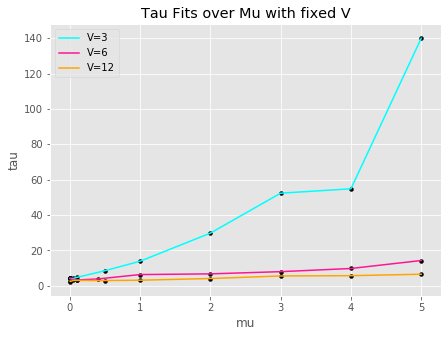

In [ ]:
fig, ax = plt.subplots( figsize=(7,5))


tau_V3=np.asarray([  4.0676722 ,   4.10949625,   4.07563538,   4.66437473,
         8.45289901,  13.81587288,  29.70908563,  52.3059792 ,
        54.80257673, 139.95058793])
tau_V6=np.asarray([ 4.26325142,  4.14739337,  3.58713583,  3.25129828,  3.79817939,
        6.28238245,  6.6767234 ,  7.93154414,  9.72058781, 14.23018861])
tau_V12=np.asarray([2.574, 2.351, 2.940, 2.972, 2.889, 3.093, 4.048, 5.497, 5.659, 6.470])
mu_V12=np.asarray([0.005,0.01,0.05,0.1,0.5,1,2,3,4,5])
mu_V6=np.asarray([0.0056, 0.011, 0.02,0.11,0.4,1,2,3,4,5])
mu_V3=np.asarray([0.005,0.01,0.05,0.1,0.5,1,2,3,4,5])
ax.plot(mu_V3,tau_V3, label ='V=3', c='aqua')
ax.scatter(mu_V3, tau_V3,c='k', s=15)
ax.plot(mu_V6,tau_V6, label = 'V=6',c='deeppink')
ax.scatter(mu_V6, tau_V6,c='k', s=15)
ax.plot(mu_V12,tau_V12, label = 'V=12',c='orange')
ax.scatter(mu_V12, tau_V12,c='k', s=15)
ax.set_xlabel('mu');ax.set_ylabel('tau');ax.set_title('Tau Fits over Mu with fixed V'),ax.legend()
# ax.set_xlim(0,0.5)
# ax.set_ylim(0,5)

(0.0031622776601683794, 100)

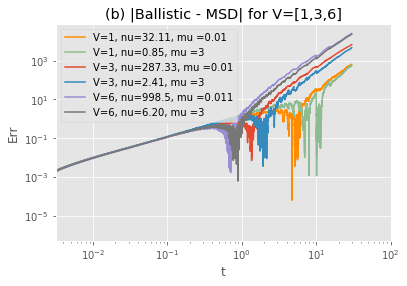

In [ ]:
tpts=np.linspace(0,30,30*800)
plt.loglog(tpts[1:len(tpts)],np.abs((1*tpts[1:len(tpts)])**2-Small_Mu_MSDs_V1['mu=0.01']),c='darkorange' ,label= 'V=1, nu=32.11, mu =0.01');
plt.loglog(tpts[1:len(tpts)],np.abs((1*tpts[1:len(tpts)])**2-Normal_Mu_MSDs_V1['mu=3']),c='darkseagreen', label= 'V=1, nu=0.85, mu =3');

plt.loglog(tpts[1:len(tpts)],np.abs((3*tpts[1:len(tpts)])**2-Small_Mu_MSDs_V3['mu=0.01']), label= 'V=3, nu=287.33, mu =0.01');
plt.loglog(tpts[1:len(tpts)],np.abs((3*tpts[1:len(tpts)])**2-Normal_Mu_MSDs_V3['mu=3']), label= 'V=3, nu=2.41, mu =3');

plt.loglog(tpts[1:len(tpts)],np.abs((6*tpts[1:len(tpts)])**2-Small_Mu_MSDs_V6['mu=0.011']), label= 'V=6, nu=998.5, mu =0.011');
plt.loglog(tpts[1:len(tpts)],np.abs((6*tpts[1:len(tpts)])**2-Normal_Mu_MSDs_V6['mu=3']), label= 'V=6, nu=6.20, mu =3');

plt.loglog(tpts[1:len(tpts)],tpts[1:len(tpts)]*0,c='k')
plt.title( '(b) |Ballistic - MSD| for V=[1,3,6]')
plt.xlabel('t');plt.ylabel('Err');plt.legend(loc='upper left')
plt.xlim(10**-2.5, 10**2)
